In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl


x = np.linspace(-5, 15, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

c0 = scipy.stats.multivariate_normal(mean=[0.,-1], cov=1.)
c1 = scipy.stats.multivariate_normal(mean=[10.,0.], cov=1.)

@np.vectorize
def gmm_pdf(x, y):    
    p = [x,y]
    return .5*c0.pdf(p) + .5*c1.pdf(p)

z = gmm_pdf(xx, yy)
z_posterior = gmm_pdf(x, [0.25])

z_kl_inc = scipy.stats.norm(loc=7, scale=4).pdf(x)

@np.vectorize
def gmm_k2(x):
    p = [x, 0.25]
    return .45*c0.pdf(p) + .55*c1.pdf(p)
z_kl_inc_k2 = gmm_k2(x)

In [2]:
def gmm_sample():
    if np.random.random() < 0.5:
        return c0.rvs()
    return c1.rvs()

gmm_samples = np.array([
    gmm_sample() for _ in range(100)
])
posterior_samples = np.array([
    np.random.choice(x, p=z_posterior / z_posterior.sum())
    for _ in range(100)
])

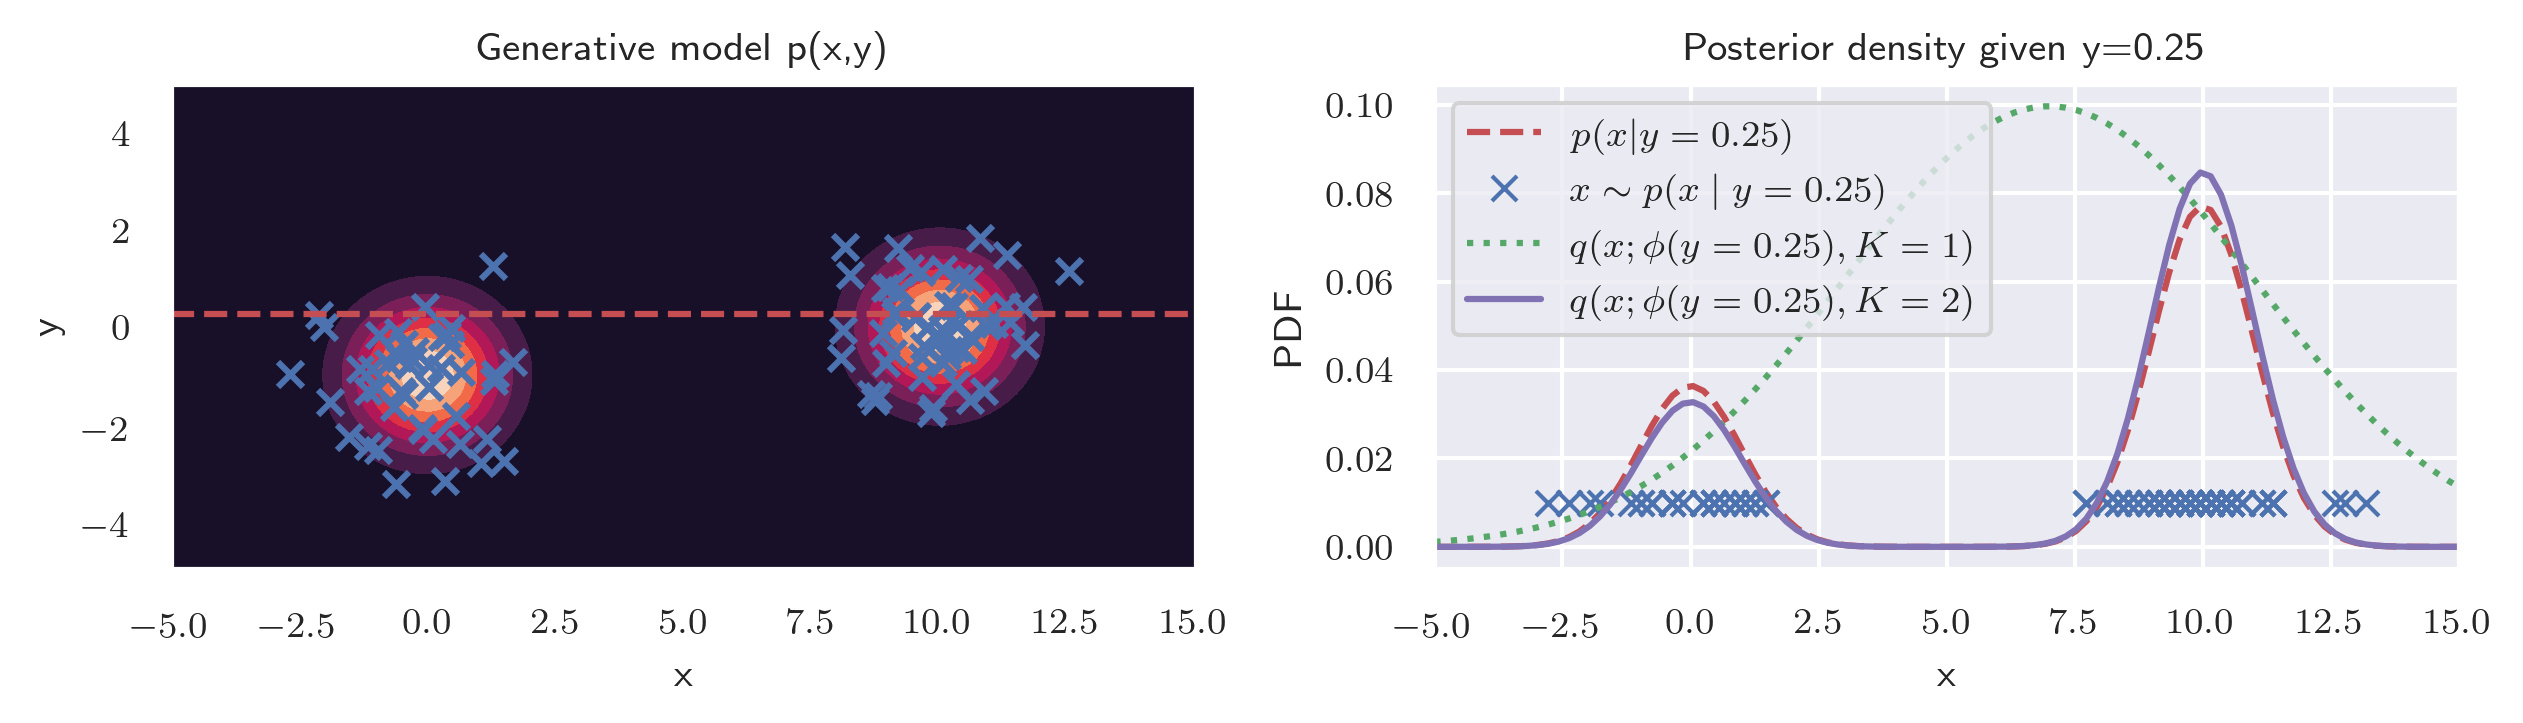

In [8]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale=0.8)

plt.rcParams.update({
    "text.usetex": True,
})
fig, ax = plt.subplots(1,2,figsize=(8.5,2.5), dpi=300)

ax[0].contourf(x,y,z)
ax[0].scatter(*gmm_samples.T, c='b', marker='x')
ax[0].axhline(y=0.25, c='r', linestyle='--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Generative model p(x,y)')

ax[1].plot(x, z_posterior, c='r', linestyle='--')
ax[1].plot(posterior_samples, [0.01]*len(posterior_samples), 'x', c='b')
ax[1].plot(x, z_kl_inc, c='g', linestyle=':')
ax[1].plot(x, z_kl_inc_k2, c='m', linestyle='-')
ax[1].set_xlim([-5,15])
ax[1].set_xlabel('x')
ax[1].set_ylabel('PDF')
ax[1].set_title('Posterior density given y=0.25')
ax[1].legend(['$p(x|y=0.25)$', r'$x \sim p(x\mid y=0.25)$', '$q(x;\phi(y=0.25), K=1)$', '$q(x;\phi(y=0.25), K=2)$'])


fig.tight_layout()
fig.savefig('intuition.pdf', dpi=300)